## WebCam
Accessing the webcam requires another module: *opencv*, and most probably certain functionality to be installed outside the Python environment. Depends on your system.

This notebook will probably not work in an online environment. 

Use with plain Python or a local Jupyter.


In [1]:
# First step is to load all required modules
from cv2 import VideoCapture, imshow, namedWindow, imwrite, destroyWindow, waitKey, cvtColor, COLOR_BGR2RGB
import matplotlib.pyplot as plt
import os
import sys



## Searching for cameras
You might have multiple cameras installed in your system and they might have different numbering. Try to search all of them (up to 3 in this example).


In [2]:
# create an empty list of webcams
webcams = []

for i in range(3):
    try:
        cam = VideoCapture(i)
        if cam.isOpened():
            webcams.append(i)
            # might be good to stop after the first one ...
    except:
        print("No camera at index ",i)
    cam.release()

print("Cameras: ",len(webcams),webcams)

if len(webcams) < 1:
    print("No cameras")
    sys.exit()

Cameras:  1 [0]


## Capture loop
Then we open the first camera and try to read the image stream. This will open a new display window outside of your browser, watch out, it might be in the background.

Focus the preview window and press any key to capture the image. It will be saved and displayed. 

This window runs in a separate *event loop*, so you would be able to record multiple images or streams.


In [3]:
# we save and load the image in the same fashion as before
# but we use "png" format which gives a better quality for the
# next chapter
TARGET_DIR = "data"
# if the directory doesn't exist, we create it
if not TARGET_DIR in os.listdir():
    os.mkdir(TARGET_DIR)

file = "webcam.jpg"

# we use the first camera availabe
cn = webcams[0]
print("Using cam ",cn)
print("Press any key to take snapshot to ",file)

# access the webcam
cam = VideoCapture(cn)
namedWindow("WebCam") 

# this is the loop where the camera handler runs in
while True:
    s, img = cam.read()
    if s:    # frame captured without any errors
        imshow("WebCam",img)

    # waitkey(0) stops until key presseed!
    k = waitKey(30)
    if k > 0 and k < 255:
        break

destroyWindow("WebCam")
cam.release()

Using cam  0
Press any key to take snapshot to  webcam.jpg


## Colorspace
opencv uses a different color mapping internally: BGR. we need to convert it to RGB

(-0.5, 639.5, 479.5, -0.5)

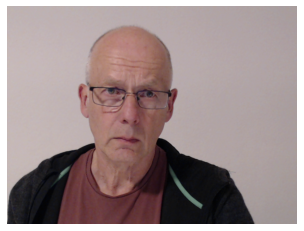

In [4]:

img_rgb = cvtColor(img, COLOR_BGR2RGB)

plt.imsave(os.path.sep.join([TARGET_DIR,file]),img_rgb)

plt.imshow(img_rgb)
plt.axis("off")

## Summary
We have seen how to record an image from the webcam. You can deal with these images in the same way as before.

In addition to webcam access opencv provides numerous image processing functions, similar to skimage.

Check the docs at [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
 and [https://pypi.org/project/opencv-python/](https://pypi.org/project/opencv-python/)
 